# **Investigating the Indian start-up ecosystem**

## Introduction

As a team looking to venture into the Indian start-up ecosystem, we are researching to understand the landscape better and identify potential areas of opportunity. I have been assigned the responsibility of studying the Indian start-up ecosystem and suggesting a suitable plan of action for our team’s development. To accomplish this task, I will create a distinctive narrative based on the 2018 to 2021 Indian start-up datasets. This will involve formulating and evaluating a hypothesis, preparing research questions, conducting analysis, and presenting insights through appropriate visualizations.

### Null Hypothesis
Fintech is not the most lucrative sector as it is not receiving the most significant amount of funding in the Indian start-up ecosystem.

### Alternative Hypothesis
Fintech is the most lucrative sector receiving the most significant funding in the Indian start-up ecosystem.

### Research Questions

1. Which sector received the most funding from 2018 to 2021?
2. How much funding has the fintech sector received in the Indian start-up ecosystem over the same period, compared to other sectors?
3. Have there been any significant fintech funding deals in the Indian start-up ecosystem from 2018 to 2021?
4. What are the top 10 sectors that had the most funding over the same period?
5. How many fintech start-up companies received funding from 2018 to 2021 compared to other companies in the top 10 sectors?
6. How does the average amount of funding received by fintech start-ups compare to the average amount of funding received by start-ups in other sectors in the Indian start-up ecosystem over the same period?
7. Have the investment trends in the Indian start-up ecosystem shown a preference for fintech companies over other sectors from 2018 to 2021?

## Data Understanding

I plan to analyze data from 2018 to 2021 to address the research questions, so it is necessary to merge the datasets. However, the column names in the 2018 datasets do not match those in 2019, 2020, and 2021 datasets, and the 2018 dataset also has fewer columns. Additionally, some of the values in the "Amount" column of the 2018 dataset are in rupees instead of dollars like the rest of the datasets.

To resolve these inconsistencies before combining the datasets, I will first adjust the column names of the 2018 dataset to align with the other datasets. After merging the datasets, any missing columns will be filled with null values. Finally, I will convert the rupee values in the "Amount" column to dollars.

In [1]:
import pandas as pd
import numpy as np

import random
import re

import glob
from collections import Counter

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
# from pandas.plotting import scatter_matrix

from sklearn.impute import SimpleImputer
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Modify Pandas options to display decimal numbers instead of scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

### Data Loading

In [3]:
# load the datasets into dataframes
start_ups_2018 = pd.read_csv('India Startup Funding/startup_funding2018.csv')
start_ups_2019 = pd.read_csv('India Startup Funding/startup_funding2019.csv')
start_ups_2020 = pd.read_csv('India Startup Funding/startup_funding2020.csv')
start_ups_2021 = pd.read_csv('India Startup Funding/startup_funding2021.csv')

In order to make the column names of the 2018 dataset consistent with the other datasets, compare the data in the different columns of the 2018 and 2019 dataframes then alter the column names accordingly.

In [4]:
start_ups_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [5]:
start_ups_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [6]:
start_ups_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [7]:
start_ups_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [8]:
start_ups_2018.rename(columns={'Company Name' : 'Company/Brand', 'Industry' : 'Sector', 'Round/Series' : 'Stage', 'Amount' : 'Amount($)', 'Location' : 'HeadQuarter', 'About Company' : 'What it does'}, inplace = True)

print(f'No. of columns initially: {len((start_ups_2018.columns).to_list())}')
start_ups_2018.columns

No. of columns initially: 6


Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does'],
      dtype='object')

In [9]:
# Reorder the columns of start_ups_2018 to match the column order of start_ups_2019
start_ups_2018 = start_ups_2018.reindex(columns = start_ups_2019.columns)

print(f'No. of columns after reindexing: {len((start_ups_2018.columns).to_list())}')
start_ups_2018.columns

No. of columns after reindexing: 9


Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

While perusing through the datasets, I discovered some occurrence of the '\t#REF!' substring. I will have to remove the substring occurrence from any string in the entire dataframe while ensuring that the original value is retained.

In [10]:
def remove_occurrence(df):
    for column in df.columns:
        df[column] = df[column].astype(str).str.replace('\t#REF!', '')

In [11]:
remove_occurrence(start_ups_2018)

In [12]:
remove_occurrence(start_ups_2019)

In [13]:
remove_occurrence(start_ups_2020)

In [14]:
remove_occurrence(start_ups_2021)

### Data Inspection and Cleaning

#### **start_ups_2018**

In [15]:
start_ups_2018.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,TheCollegeFever,nan,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",nan,nan,250000,Seed
1,Happy Cow Dairy,nan,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,nan,nan,"₹40,000,000",Seed
2,MyLoanCare,nan,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,nan,nan,"₹65,000,000",Series A
3,PayMe India,nan,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,nan,nan,2000000,Angel
4,Eunimart,nan,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,nan,nan,—,Seed


In [16]:
start_ups_2018.shape

(526, 9)

In [17]:
start_ups_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  526 non-null    object
 1   Founded        526 non-null    object
 2   HeadQuarter    526 non-null    object
 3   Sector         526 non-null    object
 4   What it does   526 non-null    object
 5   Founders       526 non-null    object
 6   Investor       526 non-null    object
 7   Amount($)      526 non-null    object
 8   Stage          526 non-null    object
dtypes: object(9)
memory usage: 37.1+ KB


In [18]:
# check for duplicated rows
start_ups_2018.duplicated().sum()

1

In [19]:
# drop duplicated rows
start_ups_2018 = start_ups_2018.drop_duplicates()

In [20]:
# check for duplicated columns
start_ups_2018.T.duplicated().sum()

2

The aforementioned code erroneously identifies duplicated columns, even though there are actually none present. This misconception arises when the columns are transposed, causing their names to be treated as indexes. The values within the transposed columns, now appearing as rows, are examined to determine if there are any instances where the values are duplicated across the transposed rows, now columns. This misinterpretation arises because columns are added during reindexing in order to align with the columns of other datasets from different years. These added columns are autofilled with missing values across all their rows.

To resolve this issue, I will need to verify the presence of duplicated columns instead.

In [21]:
# check for duplicated column names
start_ups_2018.columns.duplicated().sum()

0

After analyzing the dataframe, I observed that certain columns, namely "Amount($)" and "Founded," consist of string (object) values instead of the expected numerical format. To address this, I will need to convert the data types of these columns to numerical (float and/or integer). Once the missing values are filled in, I will convert the data type of the values in the Founded column to integer. These conversions will ensure that these columns consist of numerical values for further analysis.

In [22]:
# filter the values in the "Amount" column that are in rupees,
# change the datatype of all values to float, and convert the rupee values to dollars

start_ups_2018['Amount($)']

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4                —
          ...     
521      225000000
522              —
523           7500
524    ₹35,000,000
525       35000000
Name: Amount($), Length: 525, dtype: object

In [23]:
filt_rupee = start_ups_2018['Amount($)'].str.contains('₹')
filt_rupee.sum()

144

In [24]:
start_ups_2018['Amount($)'] = start_ups_2018['Amount($)'].apply(lambda x : str(x).replace('$', '').replace('₹', '').replace(',', '').replace('—', '0')).astype(float)
conversion_rate = 0.0146 # conversion rate of rupee to dollar in 2018
converted = start_ups_2018.loc[filt_rupee, 'Amount($)'] * conversion_rate
start_ups_2018.loc[filt_rupee, 'Amount($)'] = converted
start_ups_2018['Amount($)']

0        250000.00
1        584000.00
2        949000.00
3       2000000.00
4             0.00
          ...     
521   225000000.00
522           0.00
523        7500.00
524      511000.00
525    35000000.00
Name: Amount($), Length: 525, dtype: float64

In [25]:
filt_zeros = (start_ups_2018['Amount($)'] == float('0'))
filt_zeros.sum()

148

In [26]:
start_ups_2018.dtypes

Company/Brand     object
Founded           object
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
dtype: object

In [27]:
start_ups_2018.describe()

,Amount($)
count,525.00
mean,12650520.34
std,66524415.89
min,0.00
25%,0.00
50%,584000.00
75%,3000000.00
max,1000000000.00


In [28]:
def convert_nan_variations(df):
    # Define the variations of 'nan' to check against
    nan_variations = ['NAN', 'NAn', 'NaN', 'Nan', 'nAN', 'nAn', 'naN', 'nan', '-', '—', None]

    # Check for all nan variations and get the count of occurrences for each column
    nan_counts = df[df.columns].apply(lambda x: np.sum([str(val).lower() in nan_variations if pd.notnull(val) else False for val in x]))
    nan_counts = nan_counts.rename('nan_count')

    # Convert 'nan_variations' to np.nan in the entire DataFrame
    df.replace(nan_variations, np.nan, inplace = True)

    return nan_counts, df.isna().sum()

result = convert_nan_variations(start_ups_2018)

In [29]:
# Display the count of occurrences for each column
print('The number of occurrences for each column is:')
result[0]

The number of occurrences for each column is:


Company/Brand      0
Founded          525
HeadQuarter        0
Sector            30
What it does       0
Founders         525
Investor         525
Amount($)          0
Stage              0
Name: nan_count, dtype: int32

In [30]:
# Display the sum of missing values in each column
print('The number of missing values in each column is:')
result[1]

The number of missing values in each column is:


Company/Brand      0
Founded          525
HeadQuarter        0
Sector            30
What it does       0
Founders         525
Investor         525
Amount($)          0
Stage              0
dtype: int64

In [31]:
# Define a function to generate random years between 2010 and 2018
def generate_random_year():
    return random.randint(2010, 2018)

# Replace missing values with random years
start_ups_2018['Founded'].fillna(start_ups_2018['Founded'].apply(lambda x: generate_random_year()), inplace = True)

# Convert the dtype of values in the column to int
start_ups_2018['Founded'] = start_ups_2018['Founded'].astype(int)

# Display the updated column
start_ups_2018['Founded']

0      2015
1      2010
2      2015
3      2018
4      2016
       ... 
521    2014
522    2011
523    2012
524    2010
525    2012
Name: Founded, Length: 525, dtype: int32

In [32]:
def replace_na_with_unknown(df):
    # Replace missing values with 'Unknown'
    df['HeadQuarter'].fillna('Unknown', inplace = True)
    df['What it does'].fillna('Unknown', inplace = True)
    df['Founders'].fillna('Unknown', inplace = True)
    df['Investor'].fillna('Unknown', inplace = True)

    # Display the updated DataFrame
    return df.head()

replace_na_with_unknown(start_ups_2018)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,TheCollegeFever,2015,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",Unknown,Unknown,250000.00,Seed
1,Happy Cow Dairy,2010,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,Unknown,Unknown,584000.00,Seed
2,MyLoanCare,2015,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,Unknown,Unknown,949000.00,Series A
3,PayMe India,2018,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,Unknown,Unknown,2000000.00,Angel
4,Eunimart,2016,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,Unknown,Unknown,0.00,Seed


In [33]:
start_ups_2018.isna().sum()

Company/Brand     0
Founded           0
HeadQuarter       0
Sector           30
What it does      0
Founders          0
Investor          0
Amount($)         0
Stage             0
dtype: int64

I have to decide whether to use the mean or median to impute the missing values in the remaining columns of 2018 to 2021 datasets. I would have to consider the outliers and Missing Data Mechanism i.e., whether or not the data is missing completely at random (the missingness is unrelated to the values themselves).

In [34]:
def impute_na(df):
    # Separate instances of SimpleImputer for numerical and categorical variables
    numerical_imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', 'constant'
    categorical_imputer = SimpleImputer(strategy='most_frequent')  # or 'constant'

    # Identify numerical and categorical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(include=[object]).columns

    # Impute missing values for numerical variables
    df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

    # Impute missing values for categorical variables
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

    return df.isna().sum()

impute_na(start_ups_2018)

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [35]:
def alter_multiple_entries(df):
    df['Sector'] = df['Sector'].apply(lambda x: str(x).split(',')[0])
    df['Sector'] = df['Sector'].apply(lambda x: str(x).capitalize())

    df['HeadQuarter'] = df['HeadQuarter'].apply(lambda x: str(x).split(',')[0])
    df['HeadQuarter'].replace('Bangalore', 'Bengaluru', inplace = True)
    df['HeadQuarter'].replace('New Delhi', 'Delhi', inplace = True)
    df['HeadQuarter'].replace('Gurgaon', 'Gurugram', inplace = True)
    df['HeadQuarter'].replace('Bombay', 'Mumbai', inplace = True)
    return df['Sector'], df['HeadQuarter']

result = alter_multiple_entries(start_ups_2018)

In [36]:
# Display the new sector column
result[0]

0             Brand marketing
1                 Agriculture
2                      Credit
3          Financial services
4        E-commerce platforms
                ...          
521                       B2b
522                   Tourism
523         Food and beverage
524    Information technology
525             Biotechnology
Name: Sector, Length: 525, dtype: object

In [37]:
# Display the new HeadQuarter column
result[1]

0      Bengaluru
1         Mumbai
2       Gurugram
3          Noida
4      Hyderabad
         ...    
521    Bengaluru
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: HeadQuarter, Length: 525, dtype: object

In [38]:
# Convert the 'Founded' column to datetime object
start_ups_2018['Founded'] = pd.to_datetime(start_ups_2018['Founded'], format='%Y')

# Extract only the years from the 'Founded' column
start_ups_2018['Founded'] = start_ups_2018['Founded'].dt.year

In [39]:
start_ups_2018.sample(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
4,Eunimart,2016,Hyderabad,E-commerce platforms,Eunimart is a one stop solution for merchants ...,Unknown,Unknown,0.00,Seed
415,Duroflex Pvt. Ltd.,2010,Alleppey,Consumer goods,Duroflex Pvt. Ltd. operates as a dominant matt...,Unknown,Unknown,22000000.00,Private Equity
454,LivQuik,2013,Mumbai,Fintech,LivQuik was incorporated with the vision to si...,Unknown,Unknown,2700000.00,Corporate Round
365,Verloop,2015,Bengaluru,Customer service,Verloop is an automated customer support and e...,Unknown,Unknown,3000000.00,Series A
9,Microchip Payments,2017,Bengaluru,Mobile payments,Microchip payments is a mobile-based payment a...,Unknown,Unknown,0.00,Seed
474,Qbera,2011,Bengaluru,Finance,Qbera is a managed marketplace for unsecured p...,Unknown,Unknown,2044000.00,Venture - Series Unknown
72,BUGWORKS Research India,2015,Bengaluru,Biotechnology,BUGWORKS is a drug discovery company.,Unknown,Unknown,9000000.00,Series A
278,Poshmiles Online Solutions Private Limited,2011,Bengaluru,Travel,Poshmiles aims to help point travellers to lon...,Unknown,Unknown,0.00,Seed
431,Cellerite Systems,2014,Hyderabad,Electric vehicle,Cellerite Systems is a charging solutions prov...,Unknown,Unknown,0.00,Seed
56,Propshop24,2016,Mumbai,E-commerce,"Propshop24, a one-stop shop for a handpicked s...",Unknown,Unknown,500000.00,Seed


In [40]:
# Export the cleaned DataFrame to a CSV file

file_path = './India Startup Funding Cleaned/start_ups_2018.csv'
start_ups_2018.to_csv(file_path, index=False)

#### **start_ups_2019**

In [41]:
start_ups_2019.shape

(89, 9)

In [42]:
start_ups_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  89 non-null     object
 1   Founded        89 non-null     object
 2   HeadQuarter    89 non-null     object
 3   Sector         89 non-null     object
 4   What it does   89 non-null     object
 5   Founders       89 non-null     object
 6   Investor       89 non-null     object
 7   Amount($)      89 non-null     object
 8   Stage          89 non-null     object
dtypes: object(9)
memory usage: 6.4+ KB


In [43]:
# check for duplicated rows
start_ups_2019.duplicated().sum()

0

In [44]:
# check for duplicated columns
start_ups_2019.T.duplicated().sum()

0

In [45]:
# clean and convert the datatype of the values in the Amount($) column to float
start_ups_2019['Amount($)']

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
          ...     
84     $20,000,000
85    $693,000,000
86      $5,000,000
87     $50,000,000
88     $33,000,000
Name: Amount($), Length: 89, dtype: object

In [46]:
rupee_filter = start_ups_2019['Amount($)'].str.contains('₹')
rupee_filter.sum()

0

In [47]:
start_ups_2019['Amount($)'] = start_ups_2019['Amount($)'].apply(lambda x : str(x).replace('$', '').replace(',', ''))
start_ups_2019['Amount($)'] = start_ups_2019['Amount($)'].apply(lambda x : str(x).replace('Undisclosed', str(np.nan)))

start_ups_2019['Amount($)'] = start_ups_2019['Amount($)'].astype(float)
start_ups_2019['Amount($)']

0      6300000.00
1    150000000.00
2     28000000.00
3     30000000.00
4      6000000.00
         ...     
84    20000000.00
85   693000000.00
86     5000000.00
87    50000000.00
88    33000000.00
Name: Amount($), Length: 89, dtype: float64

In [48]:
start_ups_2019.dtypes

Company/Brand     object
Founded           object
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
dtype: object

In [49]:
start_ups_2019.describe()

,Amount($)
count,77.00
mean,43330301.30
std,110621589.91
min,100000.00
25%,2100000.00
50%,6000000.00
75%,30000000.00
max,693000000.00


In [50]:
result = convert_nan_variations(start_ups_2019)

In [51]:
# Display the count of occurrences for each column
print('The number of occurrences for each column is:')
result[0]

The number of occurrences for each column is:


Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
Name: nan_count, dtype: int32

In [52]:
# Display the sum of missing values in each column
print('The number of missing values in each column is:')
result[1]

The number of missing values in each column is:


Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)        12
Stage            46
dtype: int64

In [53]:
replace_na_with_unknown(start_ups_2019)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,Unknown,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.00,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.00,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.00,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.00,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.00,NaN


To ensure that the missing values in the Founded column are correctly handled by the numerical imputer, I will need to convert the column to a numerical data type (float) before performing the imputation.

In [54]:
start_ups_2019['Founded'] = start_ups_2019['Founded'].astype(float)

In [55]:
start_ups_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            5
What it does      0
Founders          0
Investor          0
Amount($)        12
Stage            46
dtype: int64

In [56]:
impute_na(start_ups_2019)

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [57]:
result = alter_multiple_entries(start_ups_2019)

In [58]:
# Display the new sector column
result[0]

0                   Ecommerce
1                      Edtech
2                      Edtech
3             Interior design
4                    Agritech
               ...           
84                  Infratech
85                Hospitality
86    Automobile & technology
87                 Automobile
88                    Banking
Name: Sector, Length: 89, dtype: object

In [59]:
# Display the new HeadQuarter column
result[1]

0       Unknown
1        Mumbai
2        Mumbai
3       Chennai
4     Telangana
        ...    
84       Mumbai
85     Gurugram
86        Delhi
87        Delhi
88    Rajasthan
Name: HeadQuarter, Length: 89, dtype: object

In [60]:
# Convert the 'Founded' column to datetime object
start_ups_2019['Founded'] = pd.to_datetime(start_ups_2019['Founded'], format='%Y')

# Extract only the years from the 'Founded' column
start_ups_2019['Founded'] = start_ups_2019['Founded'].dt.year

In [61]:
start_ups_2019.sample(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
76,Phable,2018,Unknown,Healthtech,"It creates an engagement loop between doctors,...",Sumit Sinha,"LetsVenture, 91 Springboard, IKP Knowledge, An...",220000.00,Series A
17,Zest Money,2015,Bengaluru,Fintech,Uses AI to do risk profiling of e-commerce con...,"Chapman, Priya Sharma, Ashish Anantharaman",Goldman Sachs.,15000000.00,Series B
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.00,Series D
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.00,Series C
82,Kratikal,2014,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu",1000000.00,Pre-series A
21,Pristyn Care,2018,Unknown,Healthcare,Delivers advanced medical care & clinical exce...,"Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garim...","Sequoia India, Hummingbird Ventures, Greenoaks...",12000000.00,Series B
20,SalaryFits,2015,Unknown,Fintech,A platform that promotes financial well-being ...,Renato Araujo,Brazilian VC Fund Confrapar,5000000.00,Series A
24,Medlife,2014,Bengaluru,Pharmaceutical,It solves inadequacies in the healthcare deliv...,"Tushar Kumar, Prashant Singh",Wilson Global Opportunities Fund,15500000.00,Series A
60,Ecom Express,2012,Gurugram,Logistics,It is a technology enabled logistics solutions...,"Krishnan, Manju Dhawan, K Satyanarayana, Sanje...",CDC Group,36000000.00,Series A
18,Witblox,2014,Unknown,Edtech,Offers a range of robotics learning tools,Amit Modi,Mumbai Angels Network,182700.00,Series A


In [62]:
# Export the cleaned DataFrame to a CSV file

file_path = './India Startup Funding Cleaned/start_ups_2019.csv'
start_ups_2019.to_csv(file_path, index=False)

#### **start_ups_2020**

In [63]:
start_ups_2020.shape

(1055, 10)

In [64]:
start_ups_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        1055 non-null   object
 2   HeadQuarter    1055 non-null   object
 3   Sector         1055 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1055 non-null   object
 6   Investor       1055 non-null   object
 7   Amount($)      1055 non-null   object
 8   Stage          1055 non-null   object
 9   Unnamed: 9     1055 non-null   object
dtypes: object(10)
memory usage: 82.5+ KB


In [65]:
# check for duplicated rows
start_ups_2020.duplicated().sum()

3

In [66]:
# drop duplicated rows
start_ups_2020 = start_ups_2020.drop_duplicates()

In [67]:
# check for duplicated columns
start_ups_2020.T.duplicated().sum()

0

Upon examining the dataframe, I discovered that some of the columns, such as "Amount($)" and "Founded" columns contain values that should be numerical but are currently strings (objects). I will need to convert the datatypes of the values in these columns to numerical (float and/or integer).

In [68]:
# clean and convert the datatype of the values in the Amount($) column to float
start_ups_2020['Amount($)']

0          $200,000
1          $100,000
2       Undisclosed
3          $400,000
4          $340,000
           ...     
1050     $1,500,000
1051    $13,200,000
1052     $8,000,000
1053     $8,043,000
1054     $9,000,000
Name: Amount($), Length: 1052, dtype: object

In [69]:
rupee_filter = start_ups_2020['Amount($)'].str.contains('₹')
rupee_filter.sum()

0

In [70]:
start_ups_2020['Amount($)'] = start_ups_2020['Amount($)'].apply(lambda x : str(x).replace('$', '').replace(',', ''))
start_ups_2020['Amount($)'] = start_ups_2020['Amount($)'].apply(lambda x : str(x).replace('887000 23000000', str(([int(num) for num in '887000 23000000'.split(' ')][0] + [int(num) for num in '887000 23000000'.split(' ')][1])/ 2)))
start_ups_2020['Amount($)'] = start_ups_2020['Amount($)'].apply(lambda x : str(x).replace('800000000 to 850000000', str(([int(num) for num in '800000000 to 850000000'.split(' to ')][0] + [int(num) for num in '800000000 to 850000000'.split(' to ')][1])/ 2)))
start_ups_2020['Amount($)'] = start_ups_2020['Amount($)'].apply(lambda x : str(x).replace('Undisclosed', str(np.nan)).replace('Undiclsosed', str(np.nan)).replace('Undislosed', str(np.nan)))

start_ups_2020['Amount($)'] = start_ups_2020['Amount($)'].astype(float)
start_ups_2020['Amount($)']

0        200000.00
1        100000.00
2              NaN
3        400000.00
4        340000.00
           ...    
1050    1500000.00
1051   13200000.00
1052    8000000.00
1053    8043000.00
1054    9000000.00
Name: Amount($), Length: 1052, dtype: float64

In [71]:
start_ups_2020.dtypes

Company/Brand     object
Founded           object
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
Unnamed: 9        object
dtype: object

In [72]:
start_ups_2020.describe()

,Amount($)
count,805.00
mean,112913068.52
std,2470568011.15
min,9.60
25%,1000000.00
50%,3000000.00
75%,11000000.00
max,70000000000.00


In [73]:
result = convert_nan_variations(start_ups_2020)

In [74]:
# Display the count of occurrences for each column
print('The number of occurrences for each column is:')
result[0]

The number of occurrences for each column is:


Company/Brand       0
Founded           213
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           0
Stage             462
Unnamed: 9       1050
Name: nan_count, dtype: int32

In [75]:
# Display the sum of missing values in each column
print('The number of missing values in each column is:')
result[1]

The number of missing values in each column is:


Company/Brand       0
Founded           213
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)         247
Stage             462
Unnamed: 9       1050
dtype: int64

In [76]:
unnamed_null = start_ups_2020['Unnamed: 9'].isna().sum()
(unnamed_null / start_ups_2020.shape[0]) * 100

99.80988593155894

The "Unnamed: 9" column has more than 99% missing values. For that reason, I will drop this column

In [77]:
start_ups_2020.drop(['Unnamed: 9'], axis = 1, inplace = True)
start_ups_2020.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [78]:
replace_na_with_unknown(start_ups_2020)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.00,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.00,Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.00,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.00,NaN


To ensure that the missing values in the Founded column are correctly handled by the numerical imputer, I will need to convert the column to a numerical data type (float) before performing the imputation.

In [79]:
start_ups_2020['Founded'] = start_ups_2020['Founded'].astype(float)

In [80]:
start_ups_2020.isna().sum()

Company/Brand      0
Founded          213
HeadQuarter        0
Sector            13
What it does       0
Founders           0
Investor           0
Amount($)        247
Stage            462
dtype: int64

In [81]:
impute_na(start_ups_2020)

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [82]:
result = alter_multiple_entries(start_ups_2020)

In [83]:
# Display the new sector column
result[0]

0                 Agritech
1                   Edtech
2       Hygiene management
3                   Escrow
4                 Agritech
               ...        
1050                Edtech
1051               Fintech
1052             Cosmetics
1053             Transport
1054              Logitech
Name: Sector, Length: 1052, dtype: object

In [84]:
# Display the new HeadQuarter column
result[1]

0         Chennai
1       Bengaluru
2            Pune
3           Delhi
4          Indore
          ...    
1050        Delhi
1051      Unknown
1052       Mumbai
1053        Delhi
1054      Chennai
Name: HeadQuarter, Length: 1052, dtype: object

In [85]:
# Convert the 'Founded' column to datetime object
start_ups_2020['Founded'] = pd.to_datetime(start_ups_2020['Founded'], format='%Y')

# Extract only the years from the 'Founded' column
start_ups_2020['Founded'] = start_ups_2020['Founded'].dt.year

In [86]:
start_ups_2020.sample(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
624,Aether Biomedical,2016,Delhi,Medtech,"Medical robotics startup, focussed on developi...","Dhruv Agrawal, Faith Jiwakhan",Chiratae Ventures,112913068.52,Seed Investment
748,Convosight,2019,Hyderabad,Data analytics,It helps business gain insights from its commu...,"Tarun Dhamija, Kartik Bansal","IvyCap Ventures, Sequoia Capital",4000000.00,Pre series A
288,Unocoin,2013,Tumkur,Fintech,Unocoin is an Indian bitcoin processor that en...,"Abhinand Kaseti, Harish B V, Sathvik Vishwanat...","Digital Finance Group, FundersClub",112913068.52,Series A
129,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.00,Seed
398,Onsitego,2010,Mumbai,Customer service company,Onsitego is a customer service company for dev...,Kunal Mahipal,"Accel, Zodius Capital",30000000.00,Series B
884,AjnaLens,2014,Thane,Deeptech,"It leverages technologies such as AR, VR & AI ...","Pankaj Raut, Abhishek Tomar, Abhijit Patil","Maharashtra Defence, Aerospace Venture Fund (M...",1500000.00,Pre series A
714,Phable,2018,Unknown,Healthtech,"It creates an engagement loop between doctors,...","Sumit Sinha, Mukesh Bansal",Inflection Point Ventures,1000000.00,Pre series A
419,Airmeet,2019,Bengaluru,Tech startup,Airmeet is an all-in-one events platform for v...,"Lalit Mangal, Manoj Singh, Vinay Kumar Jasti","Global Founders Capital, Redpoint",12000000.00,Series A
978,Konfinity,2018,Noida,Edtech,Provides online coding courses,"Navratn Singh, Kamal Pandey",Angel investors,112913068.52,Series A
998,Sabse Sasta Dukaan,2016,Kolkata,Pharmaceutical,Online pharmacy dealing in medicines,"Anish Agarwal, Anant Jain",Angel investors,112913068.52,Series A


In [87]:
# Export the cleaned DataFrame to a CSV file

file_path = './India Startup Funding Cleaned/start_ups_2020.csv'
start_ups_2020.to_csv(file_path, index=False)

#### **start_ups_2021**

In [88]:
start_ups_2021.shape

(1209, 9)

In [89]:
start_ups_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1209 non-null   object
 1   Founded        1209 non-null   object
 2   HeadQuarter    1209 non-null   object
 3   Sector         1209 non-null   object
 4   What it does   1209 non-null   object
 5   Founders       1209 non-null   object
 6   Investor       1209 non-null   object
 7   Amount($)      1209 non-null   object
 8   Stage          1209 non-null   object
dtypes: object(9)
memory usage: 85.1+ KB


In [90]:
# check for duplicated rows
start_ups_2021.duplicated().sum()

19

In [91]:
# drop duplicated rows
start_ups_2021 = start_ups_2021.drop_duplicates()

In [92]:
# check for duplicated columns
start_ups_2021.T.duplicated().sum()

0

Upon examining the dataframe, I discovered that some of the columns, such as "Amount($)" and "Founded" columns contain values that should be numerical but are currently strings (objects). I will need to convert the datatypes of the values in these columns to numerical (float and/or integer).

In [93]:
# clean and convert the datatype of the values in the Amount($) column to float
start_ups_2021['Amount($)']

0         $1,200,000
1       $120,000,000
2        $30,000,000
3        $51,000,000
4         $2,000,000
            ...     
1204        $3000000
1205       $20000000
1206       $55000000
1207       $26000000
1208        $8000000
Name: Amount($), Length: 1190, dtype: object

Furthermore, I observed that certain data within the rows of the dataframe appear to be misplaced, either shifted to the left or right. Prior to the conversion process, it is necessary for me to address this issue.

In [94]:
distorted = (start_ups_2021['Company/Brand'] == 'Sochcast')
shifted = start_ups_2021[distorted].copy()
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020.0,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,nan,nan


In [95]:
row_indexes = shifted.index.tolist()
row_indexes

[1100]

In [96]:
# Get the column names to be shifted
shift_columns = shifted.columns[2:9]  # Columns 3 to 8 (0-indexed)

# Shift the values in the selected columns to the right by 1 position
shifted.loc[:, shift_columns] = shifted.loc[:, shift_columns].shift(periods=1, axis=1)

shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020.0,None,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,nan


In [97]:
start_ups_2021[distorted] = shifted
start_ups_2021.iloc[row_indexes]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1119,CuriousJr,2020.0,Gurugram,E-learning,CuriousJr is a platform to answer kids' curios...,"Amit Shekhar, Janishar Ali, Mridul Ranjan Sahu","WaterBridge Ventures, Enzia Ventures",$1000000,Seed


In [98]:
distorted = (start_ups_2021['Amount($)'] == 'Series C')
shifted = start_ups_2021[distorted].copy()
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,nan


In [99]:
row_indexes = shifted.index.tolist()
row_indexes

[242]

In [100]:
# Get the column names to be shifted
shift_columns = shifted.columns[2:9]  # Columns 3 to 8 (0-indexed)

# Shift the values in the selected columns to the right by 1 position
shifted.loc[:, shift_columns] = shifted.loc[:, shift_columns].shift(periods=1, axis=1)

shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,None,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C


In [101]:
start_ups_2021[distorted] = shifted
start_ups_2021.iloc[row_indexes]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
261,Practically,2018.0,Hyderabad,E-learning,An experiential learning app for grades 6th to...,"Subbarao Siddabattula, Charu Noheria, Ilangove...","NB Ventures, Earlsfield Capital",$5000000,nan


In [102]:
distorted = (start_ups_2021['Amount($)'] == 'Upsparks')
shifted = start_ups_2021[distorted].copy()
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [103]:
shifted['HeadQuarter'] = shifted['HeadQuarter'].apply(lambda x: str(x).replace('Computer Games', str(np.nan))).astype(float)
# shifted['Founders'] = shifted['Founders'].apply(lambda x: str(x).replace('YC W21', str(np.nan))).astype(float)
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,NaN,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [104]:
row_indexes = shifted.index.tolist()
row_indexes

[98]

In [105]:
# Get the column names to be shifted
shift_columns = shifted.columns[5:9]  # Columns 6 to 8 (0-indexed)

# Shift the values in the selected columns to the left by 1 position
shifted.loc[:, shift_columns] = shifted.loc[:, shift_columns].shift(periods=-1, axis=1)

shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,NaN,Computer Games,A real money game app specializing in trivia g...,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,None


In [106]:
start_ups_2021[distorted] = shifted
start_ups_2021.iloc[row_indexes]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,NaN,Computer Games,A real money game app specializing in trivia g...,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,None


In [107]:
distorted = (start_ups_2021['Amount($)'] == 'Seed')
shifted = start_ups_2021[distorted].copy()
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,nan
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000,Seed,nan


In [108]:
row_indexes = shifted.index.tolist()
row_indexes

[257, 1148]

In [109]:
shifted_1 = shifted.loc[row_indexes[0]].to_frame().T
shifted_1

# Get the column names to be shifted
shift_columns = shifted_1.columns[3:9]  # Columns 4 to 8 (0-indexed)

# Shift the values in the selected columns to the right by 1 position
shifted_1.loc[:, shift_columns] = shifted_1.loc[:, shift_columns].shift(periods=1, axis=1)

shifted_1

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram,None,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed


In [110]:
shifted_2 = shifted.loc[row_indexes[1]].to_frame().T
shifted_2

# Get the column names to be shifted
shift_columns = shifted_2.columns[6:9]  # Columns 7 to 8 (0-indexed)

# Shift the values in the selected columns to the right by 1 position
shifted_2.loc[:, shift_columns] = shifted_2.loc[:, shift_columns].shift(periods=1, axis=1)

shifted_2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",None,1000000,Seed


In [111]:
shifted = pd.concat([shifted_1, shifted_2])
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram,None,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",None,1000000,Seed


In [112]:
start_ups_2021[distorted] = shifted
start_ups_2021.iloc[row_indexes]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
276,OfBusiness,2015.0,Gurugram,Financial Services,OfBusiness is a new age commerce and fintech s...,"Ruchi Kalra, Asish Mohapatra","Alpha Wave Ventures II, Tiger Global Managemen...",$325000000,nan
1167,Coutloot,2016.0,Mumbai,Consumer Services,Empowering local markets to sell online social...,"Mahima Kaul, Jasmeet Thind","Ameba Capital, 9Unicorns",$8000000,Pre-series


In [113]:
distorted = (start_ups_2021['Amount($)'] == 'ah! Ventures')
shifted = start_ups_2021[distorted].copy()
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000


In [114]:
row_indexes = shifted.index.tolist()
row_indexes

[538]

In [115]:
# Get the column names to be shifted
shift_columns = shifted.columns[4:9]  # Columns 5 to 8 (0-indexed)

# Shift the values in the selected columns to the left by 1 position
shifted.loc[:, shift_columns] = shifted.loc[:, shift_columns].shift(periods=-1, axis=1)

shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000,None


In [116]:
start_ups_2021[distorted] = shifted
start_ups_2021.iloc[row_indexes]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
557,Gourmet Garden,2019.0,Bangalore,Farming,"100% contamination free, pesticide free naturo...",Arjun Balaji,"Beyond Next Ventures, M Venture Partners",$3000000,nan


In [117]:
distorted = (start_ups_2021['Amount($)'] == 'Pre-series A')
shifted = start_ups_2021[distorted].copy()
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal",$1000000,Pre-series A,nan


In [118]:
row_indexes = shifted.index.tolist()
row_indexes

[545]

In [119]:
# Get the column names to be shifted
shift_columns = shifted.columns[6:9]  # Columns 7 to 8 (0-indexed)

# Shift the values in the selected columns to the right by 1 position
shifted.loc[:, shift_columns] = shifted.loc[:, shift_columns].shift(periods=1, axis=1)

shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal",None,$1000000,Pre-series A


In [120]:
start_ups_2021[distorted] = shifted
start_ups_2021.iloc[row_indexes]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
564,WinZO,2018.0,New Delhi,Gaming,WinZO is the largest social gaming and enterta...,Paavan Nanda,Griffin Gaming Partners,$65000000,Series C


In [121]:
distorted = (start_ups_2021['Amount($)'] == 'ITO Angel Network, LetsVenture')
shifted = start_ups_2021[distorted].copy()
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000


In [122]:
row_indexes = shifted.index.tolist()
row_indexes

[551]

In [123]:
# Get the column names to be shifted
shift_columns = shifted.columns[5:9]  # Columns 6 to 8 (0-indexed)

# Shift the values in the selected columns to the left by 1 position
shifted.loc[:, shift_columns] = shifted.loc[:, shift_columns].shift(periods=-1, axis=1)

shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000,None


In [124]:
start_ups_2021[distorted] = shifted
start_ups_2021.iloc[row_indexes]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
570,PeakPerformer,2020.0,Bangalore,EdTech,"A goal-oriented, outcome-driven platform to ma...","Aishwarya Goel, Gaurav Jhunjhnuwala",Antler India,$undisclosed,Early seed


In [125]:
distorted = (start_ups_2021['Amount($)'] == 'JITO Angel Network, LetsVenture')
shifted = start_ups_2021[distorted].copy()
shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


In [126]:
row_indexes = shifted.index.tolist()
row_indexes

[677]

In [127]:
# Get the column names to be shifted
shift_columns = shifted.columns[5:9]  # Columns 6 to 8 (0-indexed)

# Shift the values in the selected columns to the left by 1 position
shifted.loc[:, shift_columns] = shifted.loc[:, shift_columns].shift(periods=-1, axis=1)

shifted

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,None


In [128]:
start_ups_2021[distorted] = shifted
start_ups_2021.iloc[row_indexes]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
696,Humit,2020.0,Bangalore,Music,Humit is a social networking app for music sha...,"Rohit Ganapathy, Prithvi Sankar, Ishaan Negi",Antler India,$Undisclosed,Pre-seed


In [129]:
rupee_filter = start_ups_2021['Amount($)'].str.contains('₹')
rupee_filter.sum()

0

In [130]:
start_ups_2021['Amount($)'] = start_ups_2021['Amount($)'].apply(lambda x : str(x).replace('$', '').replace(',', ''))
start_ups_2021['Amount($)'] = start_ups_2021['Amount($)'].apply(lambda x : str(x).replace('Undisclosed', str(np.nan)).replace('undisclosed', str(np.nan)))
start_ups_2021['Amount($)'].replace('', 0, inplace = True, regex = True)

start_ups_2021['Amount($)'] = start_ups_2021['Amount($)'].astype(float)
start_ups_2021['Amount($)']

0        1200000.00
1      120000000.00
2       30000000.00
3       51000000.00
4        2000000.00
           ...     
1204     3000000.00
1205    20000000.00
1206    55000000.00
1207    26000000.00
1208     8000000.00
Name: Amount($), Length: 1190, dtype: float64

In [131]:
start_ups_2021.dtypes

Company/Brand     object
Founded           object
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
dtype: object

In [132]:
start_ups_2021.describe()

,Amount($)
count,1050.00
mean,171050024.76
std,4628940009.86
min,0.00
25%,1000000.00
50%,3500000.00
75%,15000000.00
max,150000000000.00


In [133]:
result = convert_nan_variations(start_ups_2021)

In [134]:
# Display the count of occurrences for each column
print('The number of occurrences for each column is:')
result[0]

The number of occurrences for each column is:


Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          61
Amount($)          0
Stage            417
Name: nan_count, dtype: int32

In [135]:
# Display the sum of missing values in each column
print('The number of missing values in each column is:')
result[1]

The number of missing values in each column is:


Company/Brand      0
Founded            1
HeadQuarter        4
Sector             1
What it does       0
Founders           4
Investor          63
Amount($)        140
Stage            421
dtype: int64

In [136]:
replace_na_with_unknown(start_ups_2021)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.00,Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.00,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.00,Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.00,Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.00,Seed


To ensure that the missing values in the Founded column are correctly handled by the numerical imputer, I will need to convert the column to a numerical data type (float) before performing the imputation.

In [137]:
start_ups_2021['Founded'] = start_ups_2021['Founded'].astype(float)

In [138]:
start_ups_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        0
Sector             1
What it does       0
Founders           0
Investor           0
Amount($)        140
Stage            421
dtype: int64

In [139]:
impute_na(start_ups_2021)

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [140]:
result = alter_multiple_entries(start_ups_2021)

In [141]:
# Display the new sector column
result[0]

0                  Ai startup
1                      Edtech
2                      Edtech
3              B2b e-commerce
4                     Fintech
                ...          
1204    Staffing & recruiting
1205         Food & beverages
1206       Financial services
1207                   Edtech
1208       Financial services
Name: Sector, Length: 1190, dtype: object

In [142]:
# Display the new HeadQuarter column
result[1]

0       Bengaluru
1          Mumbai
2          Mumbai
3          Mumbai
4        Gurugram
          ...    
1204     Gurugram
1205        Delhi
1206    Bengaluru
1207     Gurugram
1208    Bengaluru
Name: HeadQuarter, Length: 1190, dtype: object

In [143]:
# Convert the 'Founded' column to datetime object
start_ups_2021['Founded'] = pd.to_datetime(start_ups_2021['Founded'], format='%Y')

# Extract only the years from the 'Founded' column
start_ups_2021['Founded'] = start_ups_2021['Founded'].dt.year

In [144]:
start_ups_2021.sample(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
163,1K Kirana Bazaar,2018,Gurugram,Retail,India's First and Largest Network of Small-Tow...,"Abhishek Halder, Anilesh Yadav, Kumar Sangeetesh","Info Edge, FalconEdge",7000000.00,Seed
1030,The Indus Valley,2016,Chennai,Consumer goods,Consumer GoodsThe Indus Valley is a Direct to ...,"Jagadeesh Kumar, Madhumitha Udaykumar","Rukam Capital, DSG Consumer Partners, The Chen...",1100000.00,Seed
766,Wysa,2015,Bengaluru,Ai startup,Wysa is an AI conversational agent that has be...,"Jo Aggarwal, Ramakant Vempati","Kae Capital, Pi Ventures",171050024.76,Seed
126,Syook,2016,Bengaluru,Industrial automation,Syook is building the next generation enterpri...,"Saurabh Sharma, Aman Agarwal, Arjun Nagarajan","Inflection Point Ventures, ONGC",1000000.00,Series A
375,Origo,2010,Gurugram,Agritech,"Origo Commodities, a complete post-harvest man...","Sunoor Kaul, Mayank Dhanuka",YES Bank,10000000.00,Debt
306,Neobank Jupiter,2019,Mumbai,Banking,Jupiter is a digital banking app with one simp...,Jitendra Gupta,"Tiger Global, Sequoia Capital",86000000.00,Series C
460,3SC,2018,Gurugram,Logistics,An end-to-end supply chain analytics company t...,"Lalit, Sarita Das",GEF Capital’s South Asia Fund,15000000.00,Series B
910,Planys,2015,Chennai,Maritime,Planys is an Indian deep tech start-up creatin...,"Tanuj Jhunjhunwala, Vineet Upadhyay, Rakesh Si...","Kieretsu Forum, Lets Venture, Shell",1600000.00,Pre-series A
424,ReadyAssist,2018,Bengaluru,Vehicle repair startup,ReadyAssist is one of the India's leading 24/7...,Vimal Singh SV,Satish Grampurohit,1000000.00,Seed
628,Leverage Edu,2017,Delhi,Edtech,AI-enabled marketplace designed to help studen...,Akshay Chaturvedi,"Trifecta Capital Advisors, Blume Ventures",2000000.00,Debt


In [145]:
# Export the cleaned DataFrame to a CSV file

file_path = './India Startup Funding Cleaned/start_ups_2021.csv'
start_ups_2021.to_csv(file_path, index=False)

### Merge the cleaned datasets into one DataFrame

In [146]:
# merge the datasets into a single dataframe
# add a column named "Funding Year" to each dataframe before merging the dataframes,
# to indicate the year the startup received funding

# get data file names
local_path = r'/my_files'

filenames = glob.glob('India Startup Funding Cleaned' + "/*.csv")

dfs = [pd.read_csv(filename) for filename in filenames]

year = 2018

for i in np.arange(len(dfs)):
    dfs[i]['Funding Year'] = year
    year += 1

big_frame = pd.concat(dfs, ignore_index = True)

In [147]:
big_frame.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,TheCollegeFever,2015,Bengaluru,Brand marketing,"TheCollegeFever is a hub for fun, fiesta and f...",Unknown,Unknown,250000.00,Seed,2018
1,Happy Cow Dairy,2010,Mumbai,Agriculture,A startup which aggregates milk from dairy far...,Unknown,Unknown,584000.00,Seed,2018
2,MyLoanCare,2015,Gurugram,Credit,Leading Online Loans Marketplace in India,Unknown,Unknown,949000.00,Series A,2018
3,PayMe India,2018,Noida,Financial services,PayMe India is an innovative FinTech organizat...,Unknown,Unknown,2000000.00,Angel,2018
4,Eunimart,2016,Hyderabad,E-commerce platforms,Eunimart is a one stop solution for merchants ...,Unknown,Unknown,0.00,Seed,2018


In [148]:
big_frame.shape

(2856, 10)

In [149]:
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2856 non-null   object 
 1   Founded        2856 non-null   int64  
 2   HeadQuarter    2856 non-null   object 
 3   Sector         2856 non-null   object 
 4   What it does   2856 non-null   object 
 5   Founders       2856 non-null   object 
 6   Investor       2856 non-null   object 
 7   Amount($)      2856 non-null   float64
 8   Stage          2856 non-null   object 
 9   Funding Year   2856 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 223.2+ KB


In [150]:
# check for duplicated rows
big_frame.duplicated().sum()

1

In [151]:
# check for duplicated columns
big_frame.T.duplicated().sum()

0

In [152]:
big_frame.dtypes

Company/Brand     object
Founded            int64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
Funding Year       int64
dtype: object

In [153]:
big_frame.describe()

,Founded,Amount($),Funding Year
count,2856.00,2856.00,2856.00
mean,2015.57,116537814.26,2020.02
std,4.00,3097783781.59,1.09
min,1963.00,0.00,2018.00
25%,2014.00,934300.00,2020.00
50%,2016.00,4000000.00,2020.00
75%,2018.00,33500000.00,2021.00
max,2021.00,150000000000.00,2021.00


In [154]:
big_frame.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
Funding Year     0
dtype: int64

In [155]:
big_frame.sample(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
1098,Exprs,2018,Unknown,Nano distribution network,"Nano Distribution Centres, enabling seamless c...","Srinivas Madhavam, Srikanth Rajashekhar, Rahul...","Sweta Rau, Sandeep Kapoor",5660000.00,Series A,2020
1070,Sunday,2017,Bangkok,Fintech,An end-to-end insurance products and services ...,Cindy Kua,"SCB 10X, LINE Ventures",9000000.00,Pre-Series B,2020
704,KopyKitab,2013,Bengaluru,Edtech,Kopykitab is an India-based digital library th...,"Amit Shrivastava, Sumeet Verma","Paula Mariwala, Siddharth Anand",112913068.52,Series A,2020
1675,Taikee,2010,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",Unknown,1000000.00,Seed,2021
1955,Glii,2020,Noida,Dating,India’s finest dating companionship application,Shivam Kaushik,We Founder Circle,10000.00,Seed,2021
134,PerkFinance,2010,Bengaluru,Consumer lending,PerkFinance partners with employers to provide...,Unknown,Unknown,900000.00,Seed,2018
1487,Umeed Housing,2015,Haryana,Fintech,Housing finance company,Ashutosh Sharma,Morgan Stanley Private Equity Asia,23000000.00,Series D,2020
1374,DrinkPrime,2015,Bengaluru,Fintech,Water purifier subscription service,"Manas Ranjan Hota, Vijender Reddy","Abhishek Goyal, Bharat Jaisinghani, FirstCheque",112913068.52,Seed Round,2020
2080,Jumbotail,2015,Bengaluru,Food and beverages,Jumbotail is solving an important problem of o...,"Ashish Jhina, Karthik Venkateswaran","Nexus Venture Partners, 23 High Networth Indiv...",14300000.00,Series B3,2021
436,Worxogo,2017,Bengaluru,Information technology,worxogo’s is a pioneering persuasive technolog...,Unknown,Unknown,2409000.00,Series A,2018


In [156]:
# Export the cleaned DataFrame to a CSV file

file_path = './India Startup Funding Cleaned/big_frame.csv'
big_frame.to_csv(file_path, index=False)

### 1. Which sector received the most funding from 2018 to 2021?

In [157]:
sector_grp = big_frame.groupby('Sector')
funding_by_sector = sector_grp['Amount($)'].sum().reset_index()
most_funded_sector = funding_by_sector.sort_values(by = 'Amount($)', ascending = False).head(1)
most_funded_sector

,Sector,Amount($)
253,Fintech,159675228708.68


### 2. How much funding has the fintech sector received in the Indian start-up ecosystem over the same period, compared to other sectors?

In [158]:
total_funding_by_sector = funding_by_sector.sort_values(by = 'Amount($)', ascending = False)
total_funding_by_sector['Percent Funding(%)'] = (total_funding_by_sector['Amount($)'] / total_funding_by_sector['Amount($)'].sum()) * 100
filt = (total_funding_by_sector['Sector'] == 'Fintech')
total_funding_by_sector.loc[filt]

,Sector,Amount($),Percent Funding(%)
253,Fintech,159675228708.68,47.97


### 3. Have there been any significant fintech funding deals in the Indian start-up ecosystem from 2018 to 2021?

In [159]:
fintech_filt = big_frame['Sector'] == 'Fintech'
most_significant_fintech_funding = big_frame.loc[fintech_filt, ['Company/Brand', 'Founded', 'Sector', 'Amount($)', 'Funding Year']].sort_values(by = 'Amount($)', ascending = False).head(1)
most_significant_fintech_funding

,Company/Brand,Founded,Sector,Amount($),Funding Year
1739,Alteria Capital,2018,Fintech,150000000000.00,2021


### 4. What are the top 10 sectors that had the most funding over the same period?

In [160]:
top_10_sectors = total_funding_by_sector.head(10)
top_10_sectors

,Sector,Amount($),Percent Funding(%)
253,Fintech,159675228708.68,47.97
452,Retail,70713430024.76,21.25
210,Edtech,11691669407.62,3.51
199,E-commerce,3898350323.59,1.17
295,Healthcare,3803348757.77,1.14
501,Tech company,3248526137.03,0.98
51,Automotive,3047501889.56,0.92
297,Healthtech,2921221133.52,0.88
267,Food delivery,2673076000.00,0.80
252,Financial services,2650336894.29,0.80


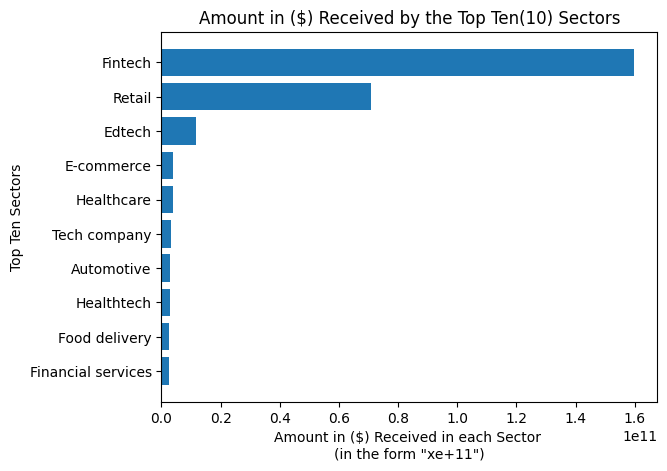

In [161]:
top_10_sectors = top_10_sectors.sort_values(by = 'Amount($)')
sector = top_10_sectors['Sector']
total_amount = top_10_sectors['Amount($)']

plt.barh(sector, total_amount)

plt.title('Amount in ($) Received by the Top Ten(10) Sectors')
plt.xlabel('Amount in ($) Received in each Sector \n(in the form "xe+11")')
plt.ylabel('Top Ten Sectors')

plt.show()

### 5. How many fintech start-up companies received funding from 2018 to 2021 compared to other companies in the top 10 sectors?

In [162]:
number_of_companies_funded = []

for sector in list(top_10_sectors['Sector']):
    number_of_companies_funded.append((big_frame['Sector'] == sector).sum())

top_10_sectors['Companies By Sector'] = number_of_companies_funded
top_10_sectors['Percent of Companies By Sector(%)'] = (top_10_sectors['Companies By Sector'] / top_10_sectors['Companies By Sector'].sum()) * 100
top_10_sectors

,Sector,Amount($),Percent Funding(%),Companies By Sector,Percent of Companies By Sector(%)
252,Financial services,2650336894.29,0.80,116,12.43
267,Food delivery,2673076000.00,0.80,7,0.75
297,Healthtech,2921221133.52,0.88,60,6.43
51,Automotive,3047501889.56,0.92,53,5.68
501,Tech company,3248526137.03,0.98,10,1.07
295,Healthcare,3803348757.77,1.14,67,7.18
199,E-commerce,3898350323.59,1.17,95,10.18
210,Edtech,11691669407.62,3.51,226,24.22
452,Retail,70713430024.76,21.25,26,2.79
253,Fintech,159675228708.68,47.97,273,29.26


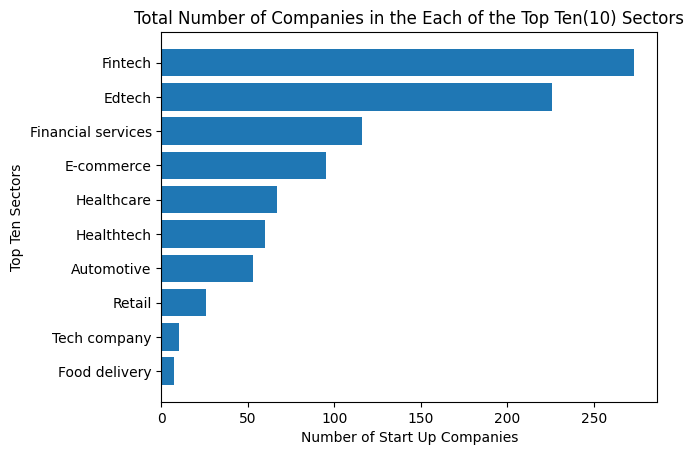

In [163]:
top_10_sectors = top_10_sectors.sort_values(by = 'Companies By Sector')
sector = top_10_sectors['Sector']
num_of_start_ups = top_10_sectors['Companies By Sector']

plt.barh(sector, num_of_start_ups)

plt.title('Total Number of Companies in the Each of the Top Ten(10) Sectors')
plt.xlabel('Number of Start Up Companies')
plt.ylabel('Top Ten Sectors')

plt.show()

### 6. How does the average amount of funding received by fintech start-ups compare to the average amount of funding received by start-ups in other sectors in the Indian start-up ecosystem over the same period?

In [164]:
mean_funding = sector_grp['Amount($)'].mean().reset_index()
average_funding_by_sector = mean_funding.sort_values(by = 'Amount($)', ascending = False)
average_funding_by_sector['Mean Percent Funding(%)'] = (average_funding_by_sector['Amount($)'] / average_funding_by_sector['Amount($)'].sum()) * 100
average_funding_by_sector

,Sector,Amount($),Mean Percent Funding(%)
452,Retail,2719747308.64,11.01
399,Multinational conglomerate company,2200000000.00,8.91
253,Fintech,584890947.65,2.37
325,Innovation management,500250000.00,2.03
448,Renewable player,390000000.00,1.58
...,...,...,...
239,Facilities support services,0.00,0.00
278,Fraud detection,0.00,0.00
96,Business travel,0.00,0.00
104,Child care,0.00,0.00


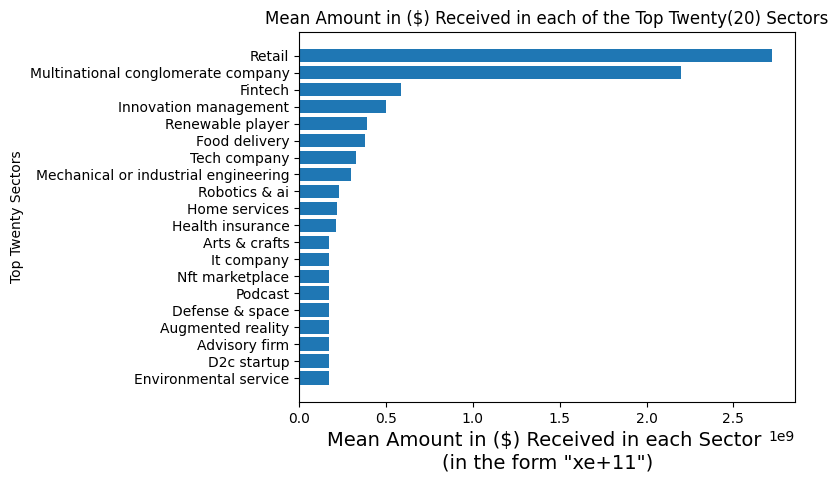

In [165]:
top_20_sectors_average_funding = average_funding_by_sector.sort_values(by = 'Amount($)', ascending = False).head(20).sort_values(by = 'Amount($)')
sector = top_20_sectors_average_funding['Sector']
mean_amount = top_20_sectors_average_funding['Amount($)']

plt.barh(sector, mean_amount)

plt.title('Mean Amount in ($) Received in each of the Top Twenty(20) Sectors')
plt.xlabel('Mean Amount in ($) Received in each Sector \n(in the form "xe+11")', fontsize = 14)
plt.ylabel('Top Twenty Sectors')

plt.show()

### 7. Have the investment trends in the Indian start-up ecosystem shown a preference for fintech companies over other sectors from 2018 to 2021?

In [166]:
def fintech_sector_count(yr):
    pd.options.mode.chained_assignment = None  # Disable warning

    year_filt = big_frame['Funding Year'] == yr

    sectors_funded = big_frame.loc[year_filt, ['Sector', 'Amount($)', 'Funding Year']]
    funded_by_sector = sectors_funded.groupby('Sector')['Amount($)'].sum().reset_index()
    filt = (funded_by_sector['Sector'] == 'Fintech')
    df = funded_by_sector.loc[filt]

    sector_list = list(big_frame.loc[year_filt, 'Sector'].dropna(axis = 'index', how = 'all'))
    sector_count = Counter(sector_list)
    sector_count = dict(sorted(sector_count.items(), key=lambda item: item[1], reverse = True))

    df.loc[df.index, 'No. of Companies'] = (sector_count['Fintech'])
    # df['No. of Companies'] = (sector_count['Fintech'])
    
    return df

fintech_sector_count(2018)

,Sector,Amount($),No. of Companies
88,Fintech,17600000.00,2.00


In [167]:
fintech_sector_count(2019)

,Sector,Amount($),No. of Companies
18,Fintech,73330301.30,5.00


In [168]:
fintech_sector_count(2020)

,Sector,Amount($),No. of Companies
118,Fintech,4744668085.48,144.00


In [169]:
fintech_sector_count(2021)

,Sector,Amount($),No. of Companies
101,Fintech,154839630321.90,122.00


In [170]:
dfs = [fintech_sector_count(2018), fintech_sector_count(2019), fintech_sector_count(2020), fintech_sector_count(2021)]
year = 2018
for i in np.arange(len(dfs)):
    dfs[i]['Funding Year'] = year
    year += 1 
data = pd.concat(dfs, ignore_index = True)
data

,Sector,Amount($),No. of Companies,Funding Year
0,Fintech,17600000.00,2.00,2018
1,Fintech,73330301.30,5.00,2019
2,Fintech,4744668085.48,144.00,2020
3,Fintech,154839630321.90,122.00,2021


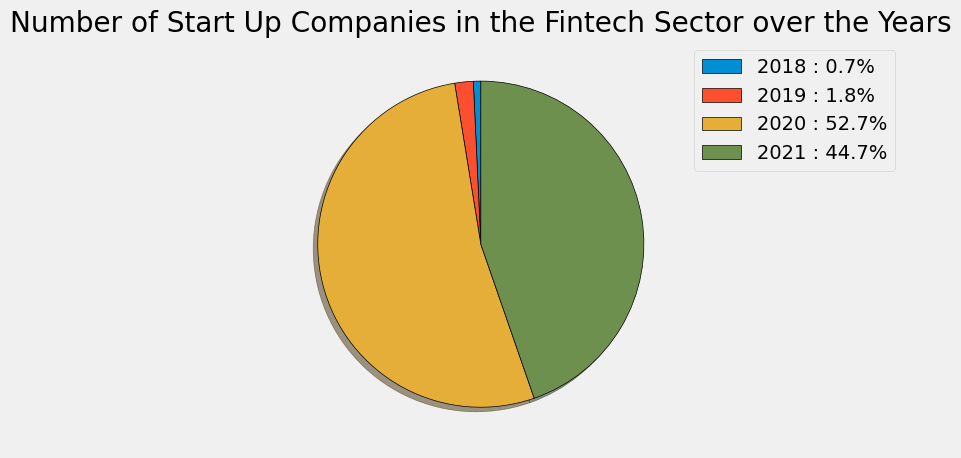

In [171]:
plt.style.use('fivethirtyeight')

slices = data['No. of Companies']
slice_labels = data['Funding Year']
size_pct = [((i/sum(data['No. of Companies']))*100) for i in data['No. of Companies']] # list of the percentage sizes of each slice

legend_labels = [f'{l} : {s:0.1f}%' for l, s in zip(slice_labels, size_pct)]
plt.pie(slices, shadow = True, startangle = 90, wedgeprops = {'edgecolor' : 'black'})

plt.title('Number of Start Up Companies in the Fintech Sector over the Years')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=legend_labels)
plt.tight_layout()
plt.show()

### Additional Analysis

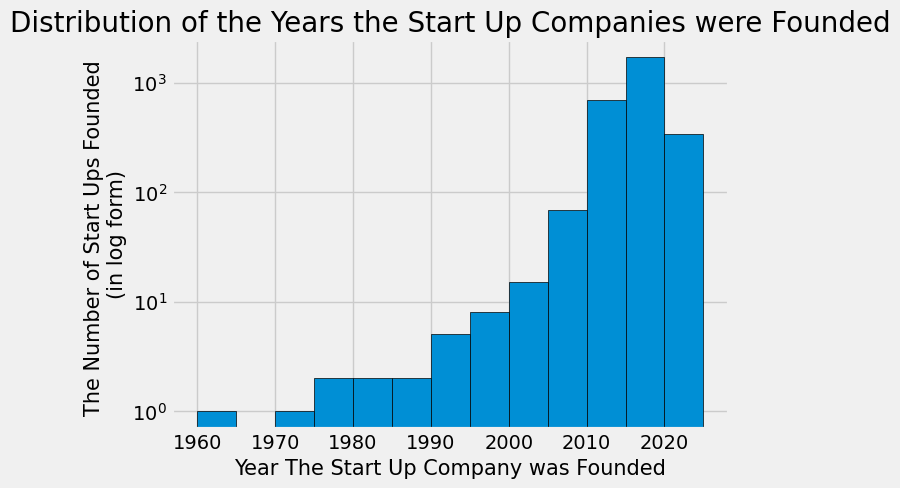

In [172]:
plt.style.use('fivethirtyeight')

year_founded = big_frame['Founded']

start = round(big_frame['Founded'].min(), -1)
stop = big_frame['Founded'].max()
step = 5

bns = np.arange(start, (stop + step), step)

plt.hist(year_founded, bins = bns, edgecolor = 'black', log = True)

plt.title('Distribution of the Years the Start Up Companies were Founded', fontsize = 20)
plt.xlabel('Year The Start Up Company was Founded', fontsize = 15)
plt.ylabel('The Number of Start Ups Founded \n(in log form)', fontsize = 15)

plt.show()

## Hypothesis Testing

In [173]:
# Subset the dataframe for Fintech sector
fintech_df = big_frame[big_frame['Sector'] == 'Fintech']
fintech_funding = fintech_df['Amount($)'].tolist()

# Subset the dataframe for other sectors
other_sector_df = big_frame[big_frame['Sector'] != 'Fintech']
other_sector_funding = other_sector_df['Amount($)'].tolist()

# Perform t-test assuming unequal variances
t_statistic, p_value = ttest_ind(fintech_funding, other_sector_funding, equal_var=False)

# Set significance level
alpha = 0.05

# Compare p-value with significance level
conclusion = "To summarize, we have "
if p_value < alpha:
    # Reject the null hypothesis
    conclusion += "rejected the null hypothesis and "
    conclusion += "accepted the alternative hypothesis, indicating that Fintech is the most lucrative sector receiving the most significant funding in the Indian start-up ecosystem."
else:
    # Fail to reject the null hypothesis
    conclusion += "failed to reject the null hypothesis. There is insufficient evidence to conclude that Fintech is the most lucrative sector receiving the most significant funding in the Indian start-up ecosystem."

conclusion

'To summarize, we have failed to reject the null hypothesis. There is insufficient evidence to conclude that Fintech is the most lucrative sector receiving the most significant funding in the Indian start-up ecosystem.'